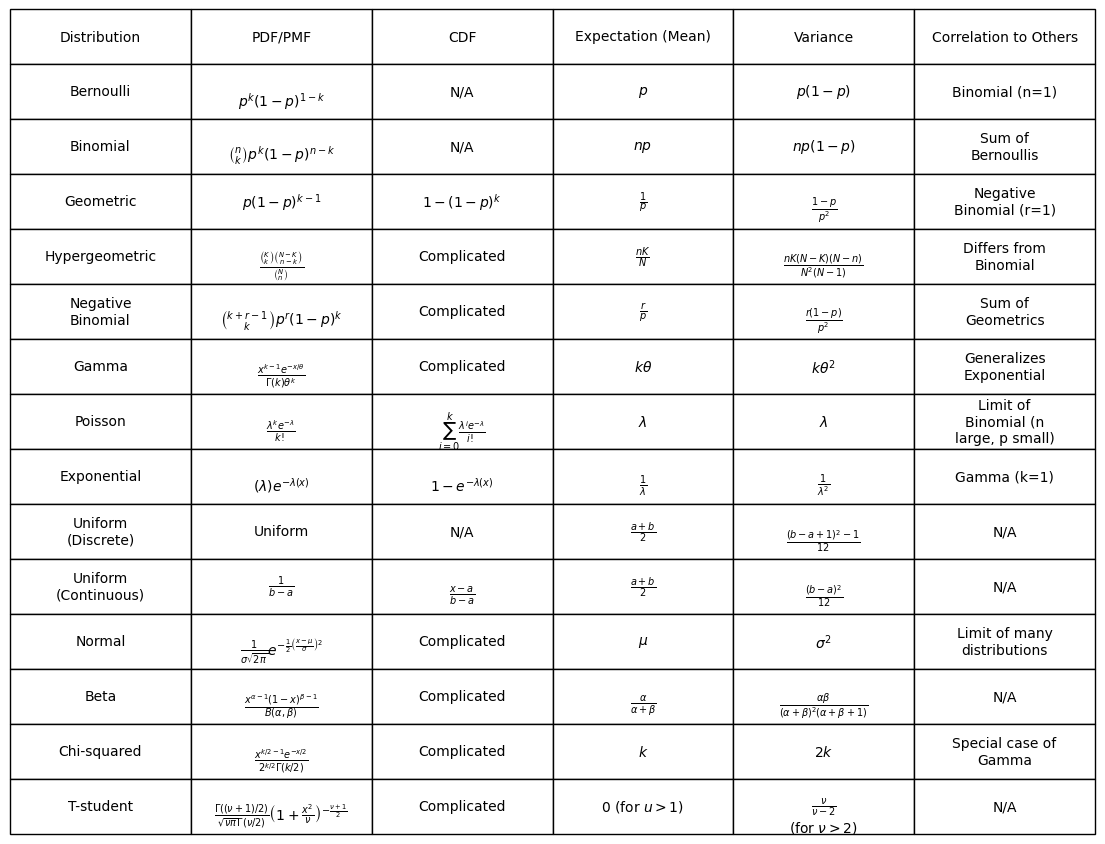

In [1]:
import matplotlib.pyplot as plt

# Dati per la tabella
data = [
    ["Distribution", "PDF/PMF", "CDF", "Expectation (Mean)", "Variance", "Correlation to Others"],
    ["Bernoulli", r"$p^k(1-p)^{1-k}$", "N/A", r"$p$", r"$p(1-p)$", "Binomial (n=1)"],
    ["Binomial", r"$\binom{n}{k}p^k(1-p)^{n-k}$", "N/A", r"$np$", r"$np(1-p)$", "Sum of Bernoullis"],
    ["Geometric", r"$p(1-p)^{k-1}$", r"$1-(1-p)^k$", r"$\frac{1}{p}$", r"$\frac{1-p}{p^2}$", "Negative Binomial (r=1)"],
    ["Hypergeometric", r"$\frac{\binom{K}{k}\binom{N-K}{n-k}}{\binom{N}{n}}$", "Complicated", r"$\frac{nK}{N}$", r"$\frac{nK(N-K)(N-n)}{N^2(N-1)}$", "Differs from Binomial"],
    ["Negative Binomial", r"$\binom{k+r-1}{k}p^r(1-p)^k$", "Complicated", r"$\frac{r}{p}$", r"$\frac{r(1-p)}{p^2}$", "Sum of Geometrics"],
    ["Gamma", r"$\frac{x^{k-1}e^{-x/\theta}}{\Gamma(k)\theta^k}$", "Complicated", r"$k\theta$", r"$k\theta^2$", "Generalizes Exponential"],
    ["Poisson", r"$\frac{\lambda^ke^{-\lambda}}{k!}$", r"$\sum_{i=0}^{k}\frac{\lambda^ie^{-\lambda}}{i!}$", r"$\lambda$", r"$\lambda$", "Limit of Binomial (n large, p small)"],
    ["Exponential", r"$(\lambda)e^{-\lambda(x)}$", r"$1-e^{-\lambda(x)}$", r"$\frac{1}{\lambda}$", r"$\frac{1}{\lambda^2}$", "Gamma (k=1)"],
    ["Uniform (Discrete)", "Uniform", "N/A", r"$\frac{a+b}{2}$", r"$\frac{(b-a+1)^2-1}{12}$", "N/A"],
    ["Uniform (Continuous)", r"$\frac{1}{b-a}$", r"$\frac{x-a}{b-a}$", r"$\frac{a+b}{2}$", r"$\frac{(b-a)^2}{12}$", "N/A"],
    ["Normal", r"$\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$", "Complicated", r"$\mu$", r"$\sigma^2$", "Limit of many distributions"],
    ["Beta", r"$\frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha,\beta)}$", "Complicated", r"$\frac{\alpha}{\alpha+\beta}$", r"$\frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$", "N/A"],
    ["Chi-squared", r"$\frac{x^{k/2-1}e^{-x/2}}{2^{k/2}\Gamma(k/2)}$", "Complicated", r"$k$", r"$2k$", "Special case of Gamma"],
    ["T-student", r"$\frac{\Gamma((\nu+1)/2)}{\sqrt{\nu\pi}\Gamma(\nu/2)}\left(1+\frac{x^2}{\nu}\right)^{-\frac{\nu+1}{2}}$", "Complicated", "0 (for $\nu>1$)", r"$\frac{\nu}{\nu-2}$ (for $\nu>2$)", "N/A"]
]

# Funzione per dividere il testo in più righe se necessario
def wrap_text(text, width=20):
    """Divide il testo in righe più corte."""
    words = text.split()
    wrapped_lines = []
    current_line = []
    current_length = 0
    for word in words:
        if current_length + len(word) > width:
            wrapped_lines.append(' '.join(current_line))
            current_line = [word]
            current_length = len(word)
        else:
            current_line.append(word)
            current_length += len(word) + 1  # +1 per lo spazio
    wrapped_lines.append(' '.join(current_line))  # Aggiungi l'ultima riga
    return '\n'.join(wrapped_lines)

# Applica wrap_text a ciascun elemento dei dati se necessario
for i in range(1, len(data)):
    for j in range(len(data[i])):
        data[i][j] = wrap_text(data[i][j], width=15)  # Regola 'width' come necessario

headers = data.pop(0)

fig, ax = plt.subplots(figsize=(14, 10))
ax.axis('off')
ax.axis('tight')

table = ax.table(cellText=data, colLabels=headers, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 3.3)  # Ajusta scala per adattarsi al testo

plt.show()


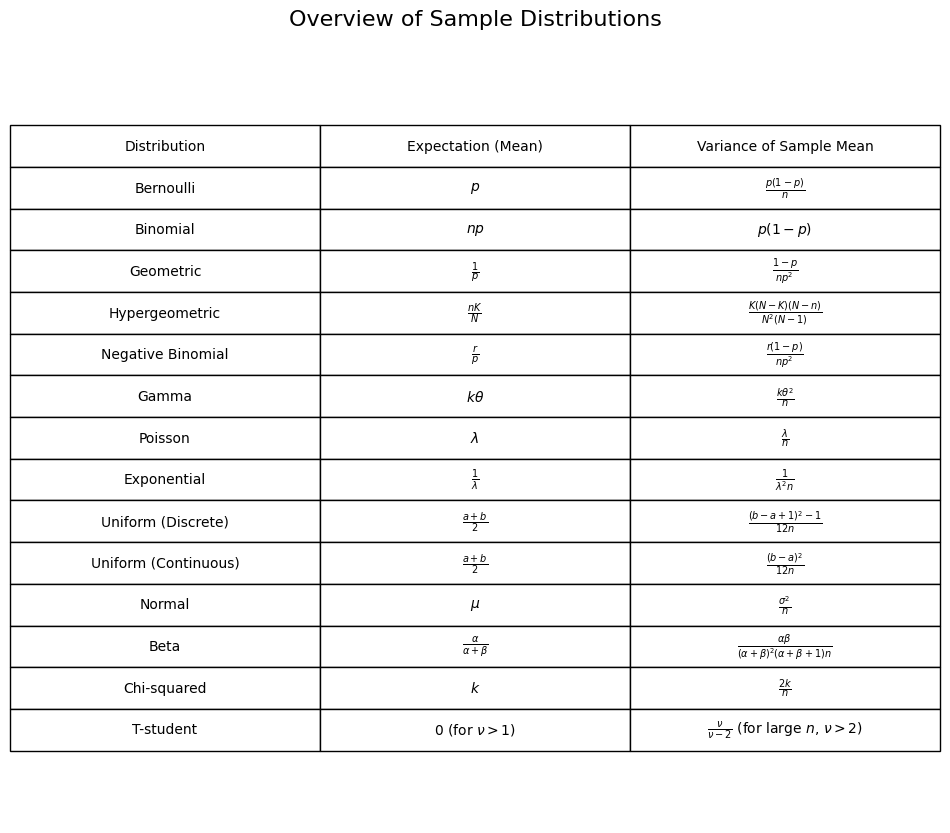

In [3]:
import matplotlib.pyplot as plt

# Preparazione dei dati per la tabella
headers = ["Distribution", "Expectation (Mean)", "Variance of Sample Mean"]
rows = [
    ["Bernoulli", r"$p$", r"$\frac{p(1-p)}{n}$"],
    ["Binomial", r"$np$", r"$p(1-p)$"],
    ["Geometric", r"$\frac{1}{p}$", r"$\frac{1-p}{np^2}$"],
    ["Hypergeometric", r"$\frac{nK}{N}$", r"$\frac{K(N-K)(N-n)}{N^2(N-1)}$"],
    ["Negative Binomial", r"$\frac{r}{p}$", r"$\frac{r(1-p)}{np^2}$"],
    ["Gamma", r"$k\theta$", r"$\frac{k\theta^2}{n}$"],
    ["Poisson", r"$\lambda$", r"$\frac{\lambda}{n}$"],
    ["Exponential", r"$\frac{1}{\lambda}$", r"$\frac{1}{\lambda^2n}$"],
    ["Uniform (Discrete)", r"$\frac{a+b}{2}$", r"$\frac{(b-a+1)^2-1}{12n}$"],
    ["Uniform (Continuous)", r"$\frac{a+b}{2}$", r"$\frac{(b-a)^2}{12n}$"],
    ["Normal", r"$\mu$", r"$\frac{\sigma^2}{n}$"],
    ["Beta", r"$\frac{\alpha}{\alpha+\beta}$", r"$\frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)n}$"],
    ["Chi-squared", r"$k$", r"$\frac{2k}{n}$"],
    ["T-student", r"0 (for $\nu>1$)", r"$\frac{\nu}{\nu-2}$ (for large $n$, $\nu>2$)"]
]



# Aumenta figsize per più spazio verticale, ad es. (larghezza, altezza)
fig, ax = plt.subplots(figsize=(12, 10))  # Aumento l'altezza qui
ax.axis('off')

# Creazione della tabella
table = ax.table(cellText=rows, colLabels=headers, cellLoc='center', loc='center')

# Ajusta la scala della tabella per più spazio
# Il primo valore è per la larghezza, il secondo per l'altezza delle celle
table.scale(1, 2.5)  # Aumenta il secondo valore per più spazio verticale

# Imposta manualmente la dimensione del font se necessario per adattarsi allo spazio extra
table.auto_set_font_size(False)
table.set_fontsize(10)


plt.title('Overview of Sample Distributions', fontsize=16, pad=20)

plt.show()


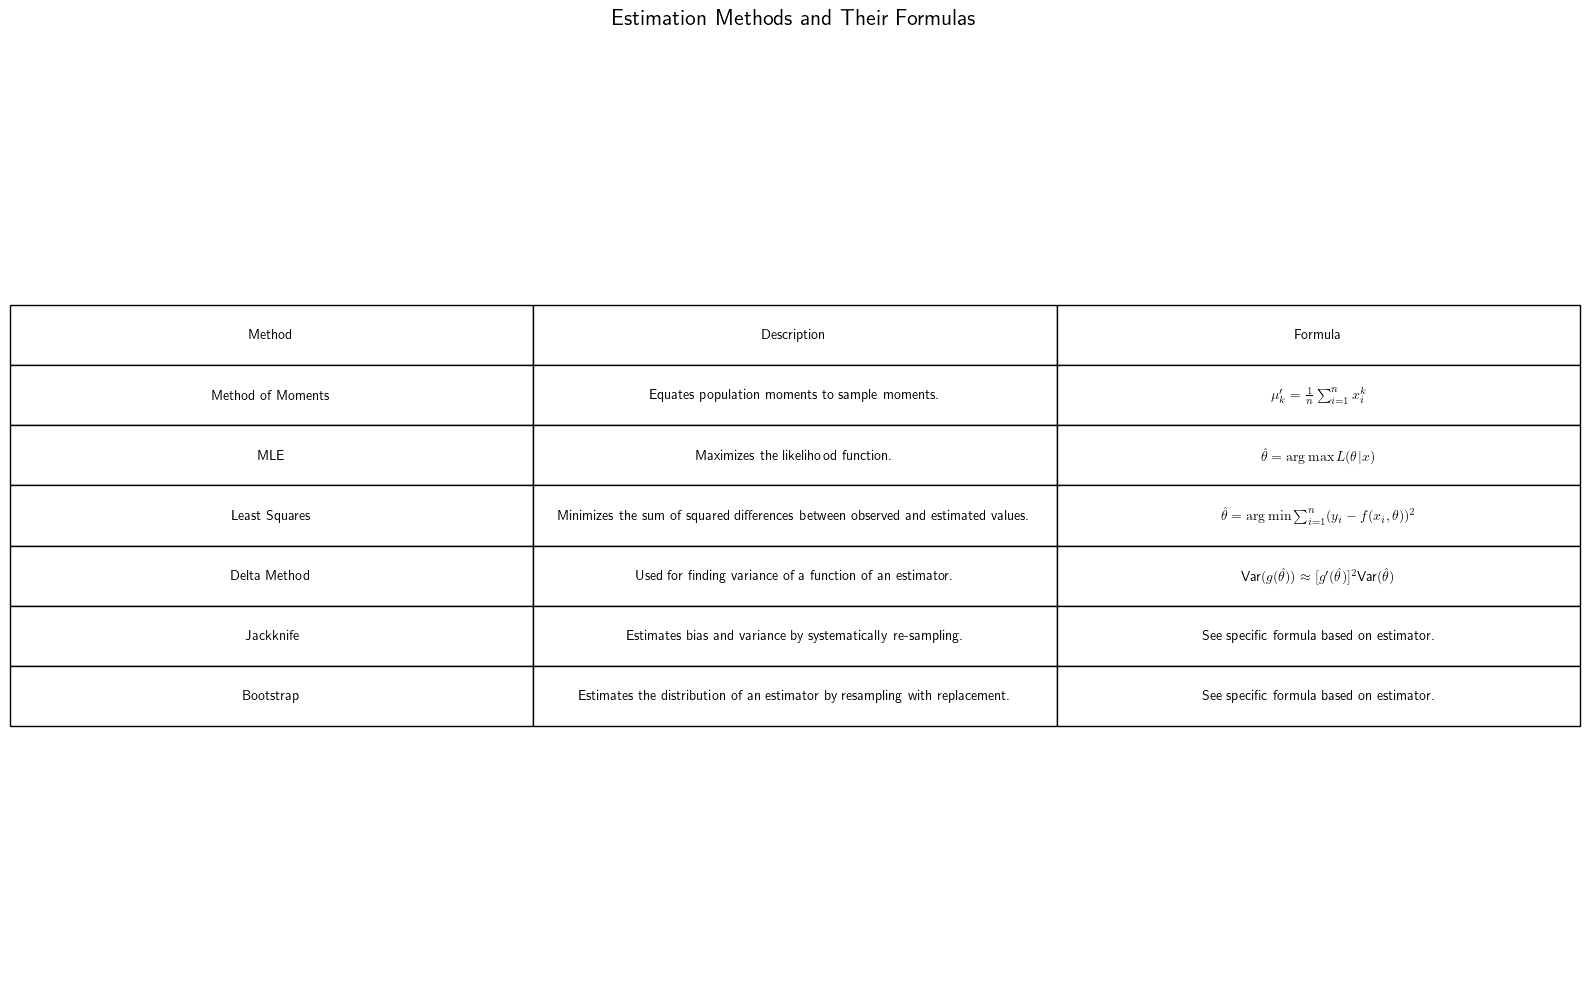

In [14]:
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
# Ensure matplotlib is configured to use LaTeX for text rendering
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

# Combined data for various estimation methods, with adjusted Delta Method row
data_combined = [
    ["Method", "Description", "Formula"],
    ["Method of Moments", "Equates population moments to sample moments.", r"$\mu'_k = \frac{1}{n}\sum_{i=1}^{n}x_i^k$"],
    ["MLE", "Maximizes the likelihood function.", r"$\hat{\theta} = \arg\max L(\theta | x)$"],
    ["Least Squares", "Minimizes the sum of squared differences between observed and estimated values.", r"$\hat{\theta} = \arg\min\sum_{i=1}^{n}(y_i - f(x_i, \theta))^2$"],
    ["Delta Method", "Used for finding variance of a function of an estimator.", r"$\text{Var}(g(\hat{\theta})) \approx [g'(\hat{\theta})]^2 \text{Var}(\hat{\theta})$"],
    ["Jackknife", "Estimates bias and variance by systematically re-sampling.", "See specific formula based on estimator."],
    ["Bootstrap", "Estimates the distribution of an estimator by resampling with replacement.", "See specific formula based on estimator."]
]

fig, ax = plt.subplots(figsize=(16, 10))  # Adjusted for content
ax.axis('off')
table = ax.table(cellText=data_combined[1:], colLabels=data_combined[0], cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 3)  # Adjust scaling for visibility
plt.title("Estimation Methods and Their Formulas", fontsize=16, pad=20)
plt.tight_layout()
plt.show()


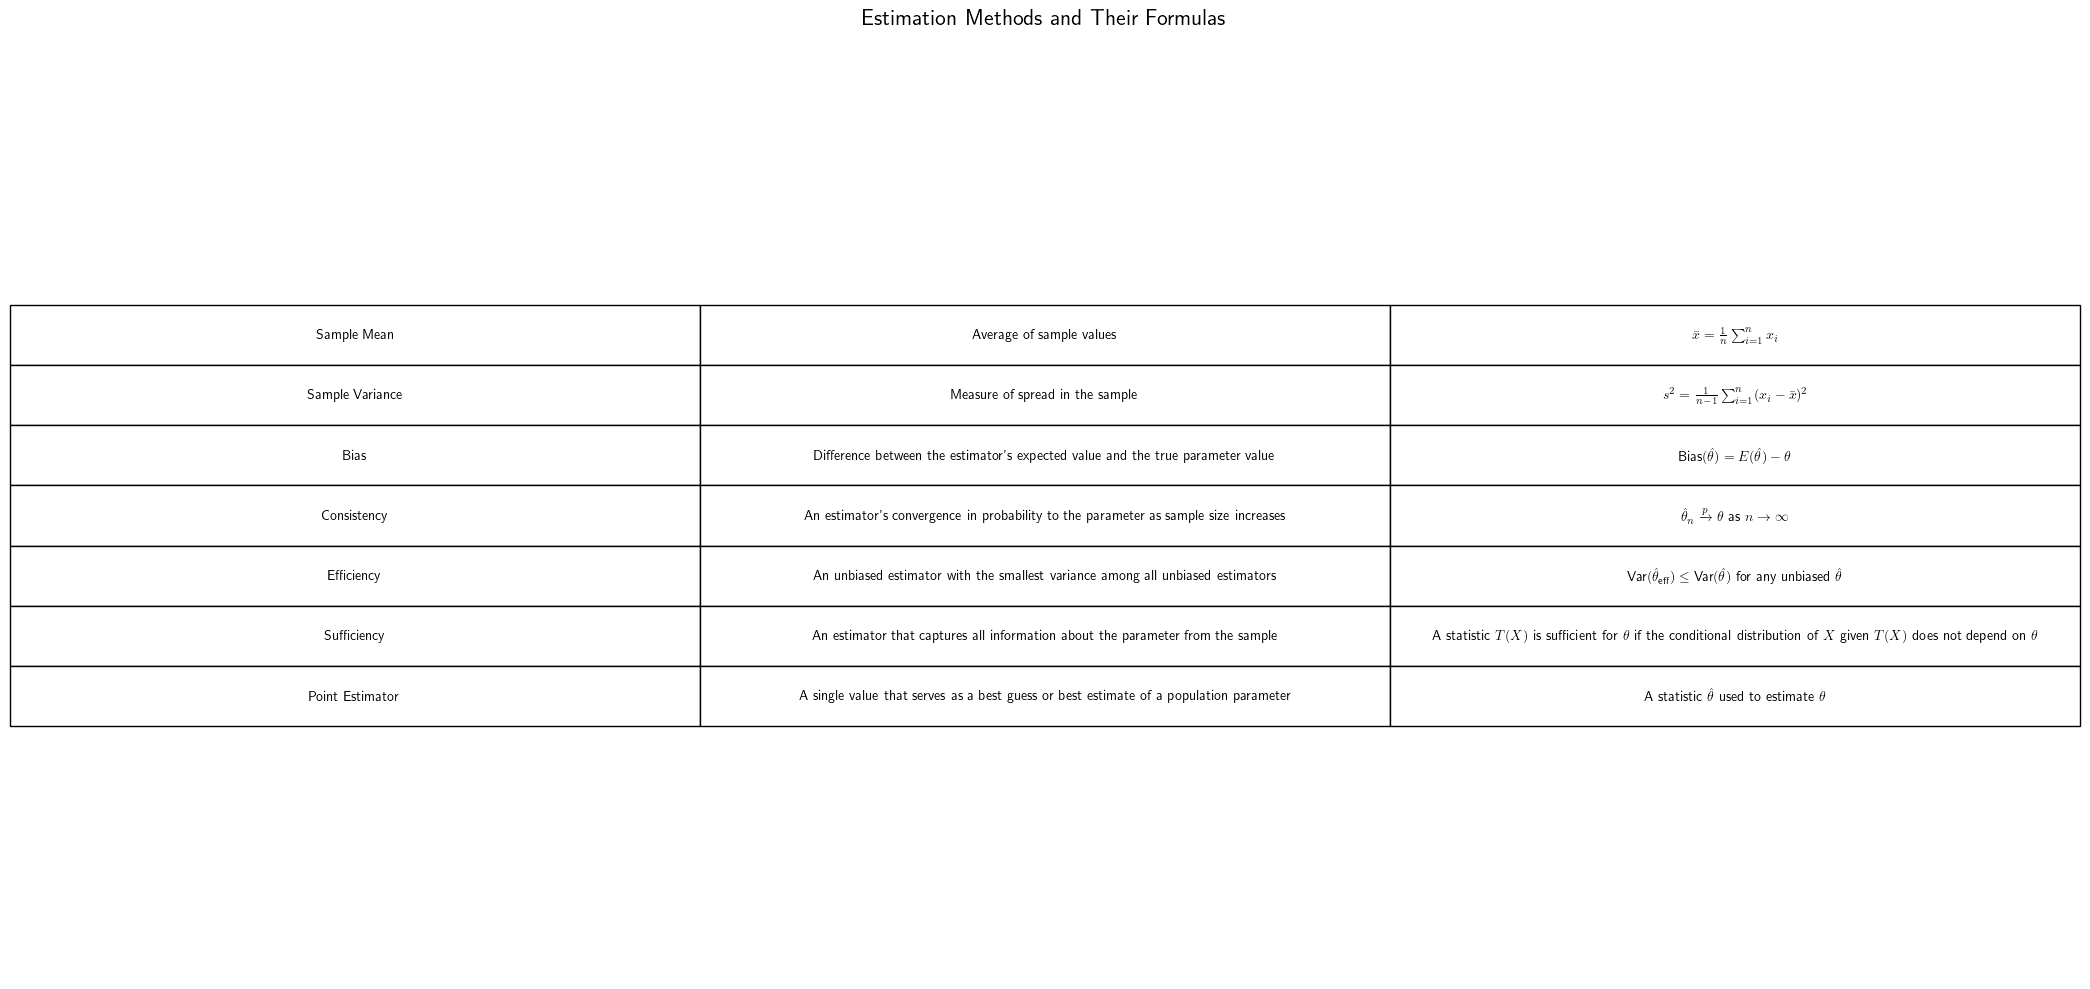

In [18]:
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
# Ensure matplotlib is configured to use LaTeX for text rendering
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

# Combined data for various estimation methods, with adjusted Delta Method row
data_combined = [
    ["Sample Mean", "Average of sample values", r"$\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i$"],
    ["Sample Variance", "Measure of spread in the sample", r"$s^2 = \frac{1}{n-1}\sum_{i=1}^{n} (x_i - \bar{x})^2$"],
    ["Bias", "Difference between the estimator's expected value and the true parameter value", r"$\text{Bias}(\hat{\theta}) = E(\hat{\theta}) - \theta$"],
    ["Consistency", "An estimator's convergence in probability to the parameter as sample size increases", r"$\hat{\theta}_n \xrightarrow{p} \theta$ as $n \to \infty$"],
    ["Efficiency", "An unbiased estimator with the smallest variance among all unbiased estimators", r"$\text{Var}(\hat{\theta}_{\text{eff}}) \leq \text{Var}(\hat{\theta})$ for any unbiased $\hat{\theta}$"],
    ["Sufficiency", "An estimator that captures all information about the parameter from the sample", r"A statistic $T(X)$ is sufficient for $\theta$ if the conditional distribution of $X$ given $T(X)$ does not depend on $\theta$"],
    ["Point Estimator", "A single value that serves as a best guess or best estimate of a population parameter", r"A statistic $\hat{\theta}$ used to estimate $\theta$"],

]

fig, ax = plt.subplots(figsize=(21, 10))  # Adjusted for content
ax.axis('off')
table = ax.table(cellText=data_combined[1:], colLabels=data_combined[0], cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 3)  # Adjust scaling for visibility
plt.title("Estimation Methods and Their Formulas", fontsize=16, pad=20)
plt.tight_layout()
plt.show()


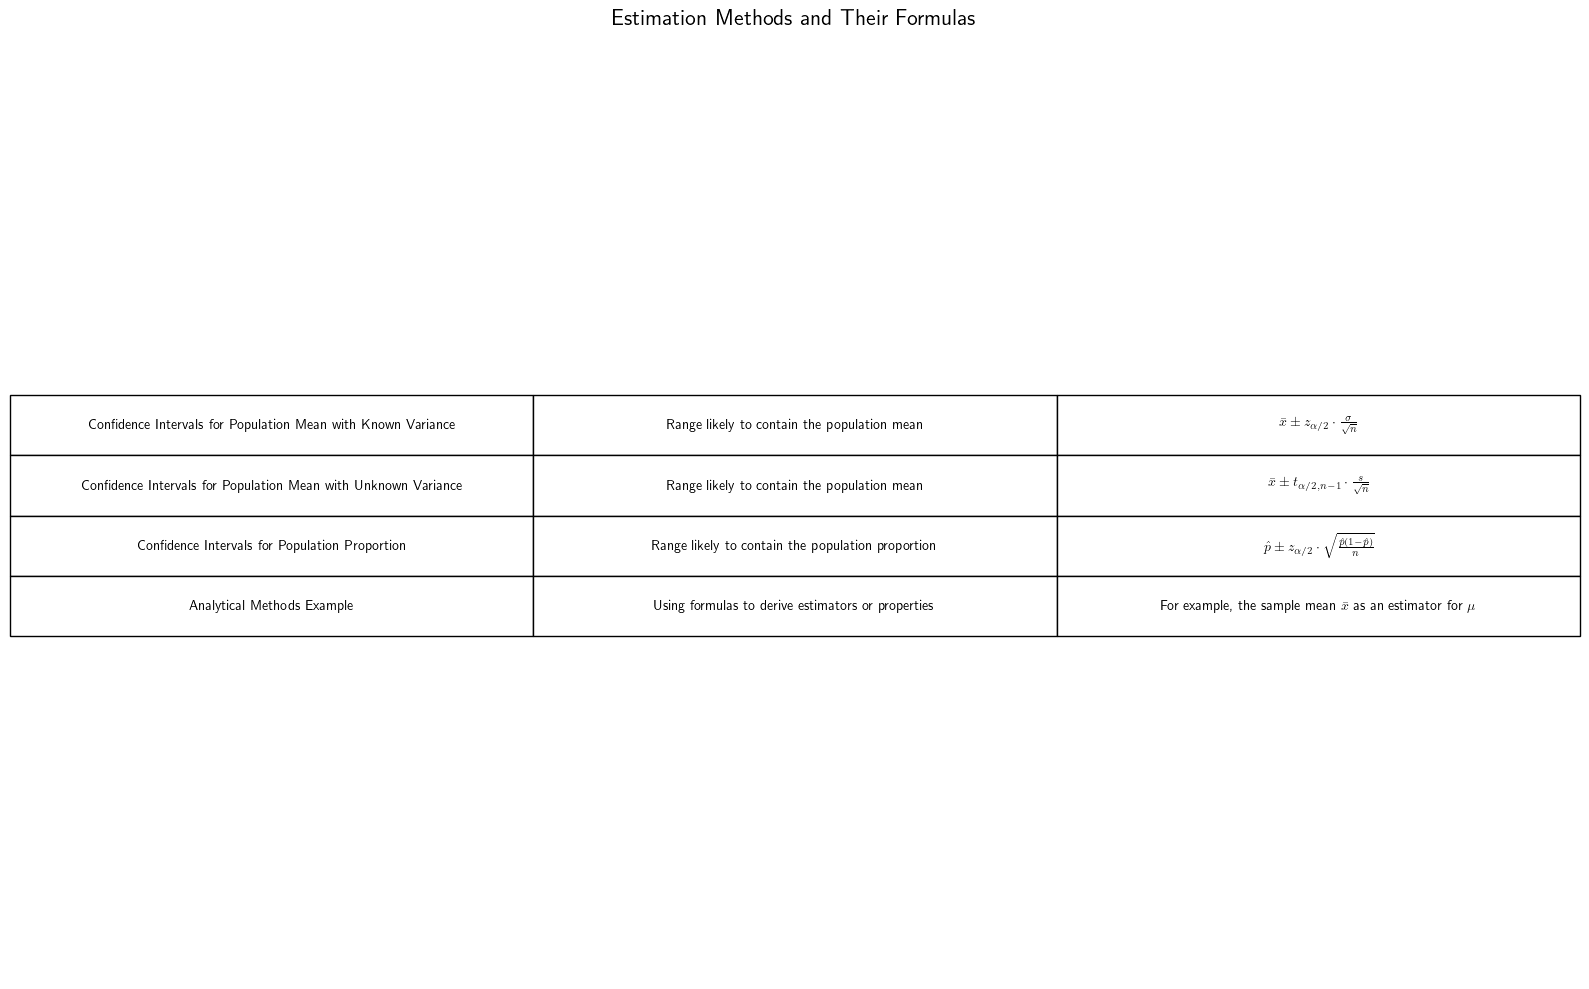

In [19]:
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
# Ensure matplotlib is configured to use LaTeX for text rendering
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

# Combined data for various estimation methods, with adjusted Delta Method row
data_combined = [
    ["Confidence Intervals for Population Mean with Known Variance", "Range likely to contain the population mean", r"$\bar{x} \pm z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}$"],
    ["Confidence Intervals for Population Mean with Unknown Variance", "Range likely to contain the population mean", r"$\bar{x} \pm t_{\alpha/2, n-1} \cdot \frac{s}{\sqrt{n}}$"],
    ["Confidence Intervals for Population Proportion", "Range likely to contain the population proportion", r"$\hat{p} \pm z_{\alpha/2} \cdot \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$"],
    ["Analytical Methods Example", "Using formulas to derive estimators or properties", r"For example, the sample mean $\bar{x}$ as an estimator for $\mu$"],

]

fig, ax = plt.subplots(figsize=(16, 10))  # Adjusted for content
ax.axis('off')
table = ax.table(cellText=data_combined[1:], colLabels=data_combined[0], cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 3)  # Adjust scaling for visibility
plt.title("Estimation Methods and Their Formulas", fontsize=16, pad=20)
plt.tight_layout()
plt.show()


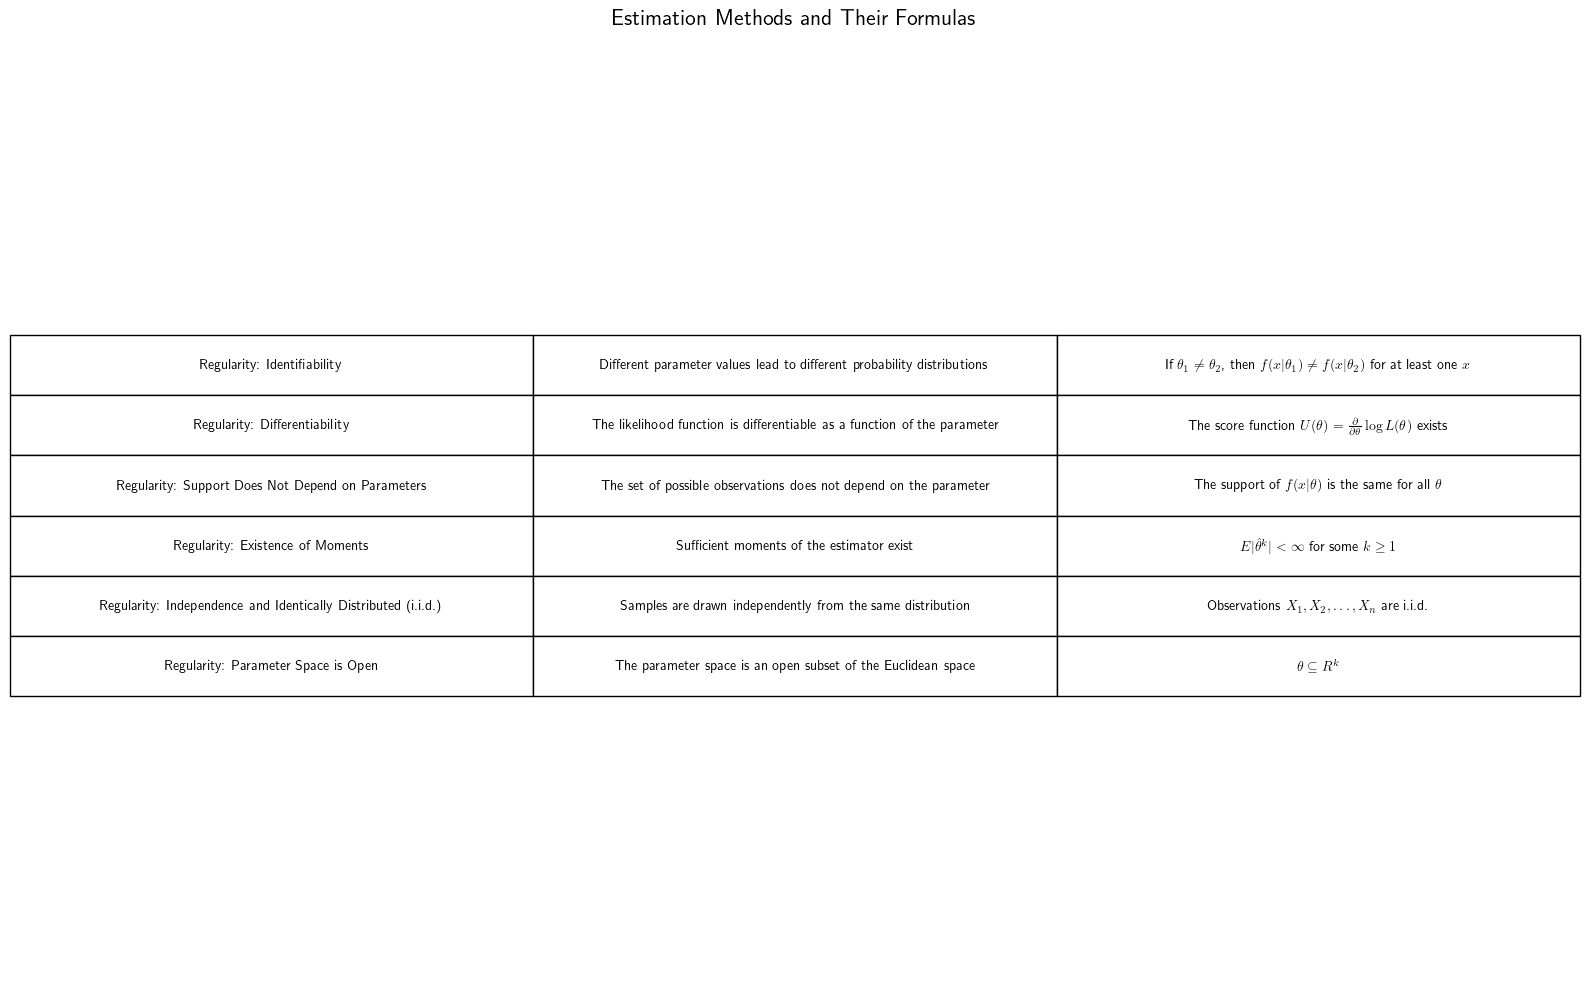

In [20]:
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
# Ensure matplotlib is configured to use LaTeX for text rendering
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

# Combined data for various estimation methods, with adjusted Delta Method row
data_combined = [
    ["Regularity: Identifiability", "Different parameter values lead to different probability distributions", r"If $\theta_1 \neq \theta_2$, then $f(x|\theta_1) \neq f(x|\theta_2)$ for at least one $x$"],
    ["Regularity: Differentiability", "The likelihood function is differentiable as a function of the parameter", r"The score function $U(\theta) = \frac{\partial}{\partial \theta} \log L(\theta)$ exists"],
    ["Regularity: Support Does Not Depend on Parameters", "The set of possible observations does not depend on the parameter", r"The support of $f(x|\theta)$ is the same for all $\theta$"],
    ["Regularity: Existence of Moments", "Sufficient moments of the estimator exist", r"$E|\hat{\theta}^k| < \infty$ for some $k \geq 1$"],
    ["Regularity: Independence and Identically Distributed (i.i.d.)", "Samples are drawn independently from the same distribution", r"Observations $X_1, X_2, \ldots, X_n$ are i.i.d."],
    ["Regularity: Parameter Space is Open", "The parameter space is an open subset of the Euclidean space", r"$\theta \subseteq R^k$"],

]

fig, ax = plt.subplots(figsize=(16, 10))  # Adjusted for content
ax.axis('off')
table = ax.table(cellText=data_combined[1:], colLabels=data_combined[0], cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 3)  # Adjust scaling for visibility
plt.title("Estimation Methods and Their Formulas", fontsize=16, pad=20)
plt.tight_layout()
plt.show()
